# Applied Chapter 3: Linear Regression

In [6]:
# importing our packages
import numpy as np 
import pandas as pd 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from scipy import stats
from sklearn import datasets
from IPython.display import display, HTML

# setting up our plots 
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') #
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [7]:
# reading in our csv
auto = pd.read_csv('Auto.csv')

In [8]:
# maling a copy just in case
auto_modified = auto.copy

In [9]:
# removing null filler "?"
auto = auto.drop(auto[auto.values == '?'].index)
auto = auto.reset_index()

In [10]:
# here we are defining our quatitaive variables
datatypes = {'quant': ['mpg','cylinders','displacement','horsepower','weight','acceleration'],'qual': ['origin','name']}

# we are changing the quat dtypes to float for our regression model
quants = auto[datatypes['quant']].astype(np.float_)

#we are using pd.concat to merge our quants that we turned to floats with our qual varabiles
auto = pd.concat([quants, auto[datatypes['qual']]], axis=1)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,1,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,1,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,1,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,1,ford torino


### (a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:
###### i. Is there a relationship between the predictor and the response?
###### ii. How strong is the relationship between the predictor and the response?
###### iii. Is the relationship between the predictor and the response positive or negative?
###### iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [11]:
# here we are returning the results of of regression

# we can use statsmodel as a substitue for R's lm() funtion
import statsmodels.api as sm
%matplotlib inline

lm = sm.OLS.from_formula(' mpg ~ horsepower', auto)
results = lm.fit() 

results.summary()
#result.rsquared, result.fvalue, result.params.Intercept, result.params.lstat

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 01 Oct 2021   Prob (F-statistic):           7.03e-81
Time:                        11:06:25   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. Is there a relationshhip between mpg and hourse power?
    1. Yes. Our P>|t| is 0.00
2. How strong is the relationship between the predictor and the response?
    2. Our coef is -0.1578 so if we wanted to increase our horsepower 10 units we should expect a -1.578 decrease in fuel efficency
3. Is the correlation negative or psotive?
    2. Negative
4. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [12]:
# """"""""model built by a- martyn: https://github.com/a-martyn/ISL-python/blob/master/Notebooks/ch3_linear_regression_applied.ipynb""""""""""

intercept_const = pd.DataFrame({'intercept': np.ones(auto.shape[0])})

X = pd.concat([intercept_const, auto['horsepower']], axis=1)
y = auto['mpg']

def linear_model(X, y):
    """Estimation of parameteres for linear regressions model
    by Ordinary Least Squares (OLS)"""
    XTX_inv = np.linalg.inv(X.T @ X)
    XTy     = X.T @ y
    beta    = XTX_inv @ XTy
    return beta

def predict(beta, X):
    """Perdict y given beta parameters and X variables"""
    return X @ beta

beta = linear_model(X, y)
y_pred = predict(beta, X)

In [13]:
# """"""""model built by a- martyn: https://github.com/a-martyn/ISL-python/blob/master/Notebooks/ch3_linear_regression_applied.ipynb""""""""""

# Add constant for bias variable
intercept_const = pd.DataFrame({'intercept': np.ones(auto.shape[0])})
#Load data
X = pd.concat([intercept_const, auto['horsepower']], axis=1)
y = auto['mpg']

# Predict coefficients and responses
coefficients = linear_model(X, y)
y_pred       = predict(beta, X)


# Calculate Mean Squared Error
MSE = np.sum(np.square(y_pred - y)) / y.size

# Variance of each variable in X
variance = MSE * (np.linalg.inv(X.T @ X).diagonal())  # To discuss: how is variance derived from MSE?

# Standard error of each variable in X
# given by Var(X) = SE(X)^2
standard_error = np.sqrt(variance)

# t-statistic given by t = β - 0 / SE(β)
t_statistic = coefficients / standard_error

# p-values
p_values = 2*(1 - stats.t.cdf(X.shape[0], np.abs(t_statistic)))


# Present results
results = pd.DataFrame({'feature': X.columns,
                        'coefficients': coefficients,
                        'standard_error': standard_error,
                        't-statistic': t_statistic,
                        'P>|t|': p_values})

results.set_index('feature')

,coefficients,standard_error,t-statistic,P>|t|
feature,,,,
intercept,39.935861,0.715666,55.802376,0.0
horsepower,-0.157845,0.006429,-24.551848,0.0


In [14]:
def predict(model, X):
    return model.T @ X
X_ex = np.array ([1,98])
y_ex = predict(coefficients, X_ex)
print(str(np.round(y_ex, 3)) + 'mpg')

24.467mpg


(b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

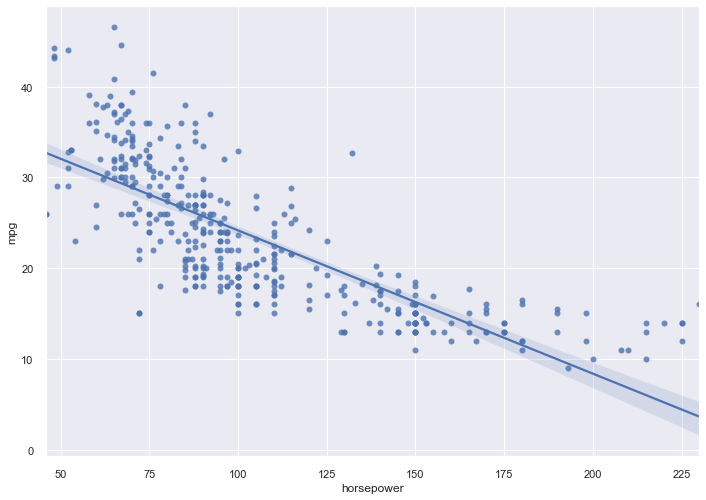

In [15]:
# Simple Linear Regression: responce = mpg, predictor = horsepower
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x = 'horsepower', y = 'mpg', data = auto)

(c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

In [16]:
# Functions to emulate R's lm().plot() functionality
# Providing powerful residual plots for simple AND multivariate
# linear regresssion
# - bring your own predictions
# - underlying stats available as pandas dataframe
# - visualise linearity and outliers in multiple dimensions


def lm_stats(X, y, y_pred):
    """ LEVERAGE & STUDENTISED RESIDUALS
    - https://en.wikipedia.org/wiki/Studentized_residual#How_to_studentize
    """
    # Responses as np array vector
    try: 
        y.shape[1] == 1
        # take first dimension as vector
        y = y.iloc[:,0]
    except:
        pass
    y = np.array(y)
    
    # Residuals
    residuals = np.array(y - y_pred)
    
    # Hat matrix
    H = np.array(X @ np.linalg.inv(X.T @ X)) @ X.T
    
    # Leverage
    h_ii = H.diagonal()
    
    ## Externally studentised residual
    # In this case external studentisation is most appropriate 
    # because we are looking for outliers.
    
    # Estimate variance (externalised)
    σi_est = []
    for i in range(X.shape[0]):
        # exclude ith observation from estimation of variance
        external_residuals = np.delete(residuals, i)
        σi_est += [np.sqrt((1 / (X.shape[0] - X.shape[1] - 1)) * np.sum(np.square(external_residuals)))]
    σi_est = np.array(σi_est)
    
    # Externally studentised residuals
    t = residuals / σi_est * np.sqrt(1 - h_ii)
    

    # Return dataframe
    return pd.DataFrame({'residual': residuals,
                         'leverage': h_ii, 
                         'studentised_residual': t,
                         'y_pred': y_pred})


def lm_plot(lm_stats_df): 
    """Provides R style residual plots based on results from lm_stat()"""
    # Parse stats
    t      = lm_stats_df['studentised_residual']
    h_ii   = lm_stats_df['leverage']
    y_pred = lm_stats_df['y_pred']
    
    # setup axis for grid
    plt.figure(1, figsize=(16, 18))
    
    # Studentised residual plot
    plt.subplot(321)
    ax = sns.regplot(x=y_pred, y=t, lowess=True)
    plt.xlabel('Fitted values')
    plt.ylabel('Studentised residuals')
    plt.title('Externally studentised residual plot', fontweight='bold')
    # Draw Hastie and Tibshirani's bounds for possible outliers
    ax.axhline(y=3, color='r', linestyle='dashed')
    ax.axhline(y=-3, color='r', linestyle='dashed');
    
    # Normal Q-Q plot
    plt.subplot(322)
    ax = stats.probplot(t, dist='norm', plot=plt)
    plt.ylabel('Studentised residuals')
    plt.title('Normal Q-Q', fontweight='bold')
    
    # Standardised residuals
    plt.subplot(323)
    ax = sns.regplot(x=y_pred, y=np.sqrt(np.abs(t)), lowess=True)
    plt.xlabel('Fitted values')
    plt.ylabel('√Standardized residuals')
    plt.title('Scale-Location', fontweight='bold')
    
    # Residuals vs Leverage plot
    plt.subplot(324)
    ax = sns.scatterplot(x=h_ii, y=t)
    plt.xlabel('Leverage')
    plt.ylabel('Studentised residuals')
    plt.title('Externally studentised residual vs Leverage', fontweight='bold');

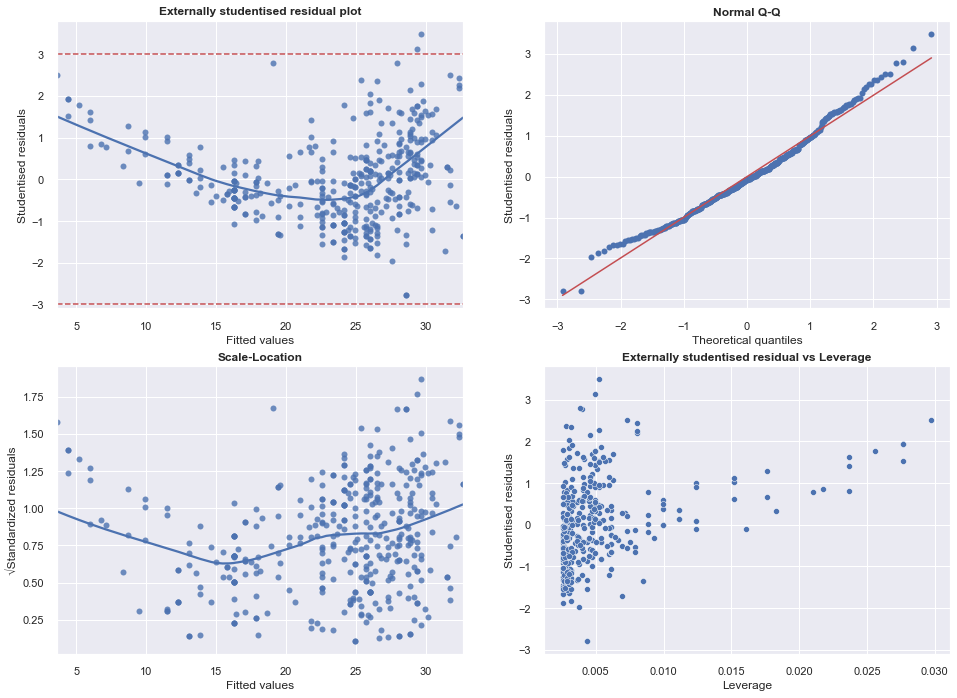

In [17]:
X = pd.concat([auto['horsepower']], axis=1)

# Create the Design Matrix by adding constant bias variable
intercept_const = pd.DataFrame({'intercept': np.ones(X.shape[0])})
X = np.array(pd.concat([intercept_const, X], axis=1))

y = auto['mpg']

lm_plot(lm_stats(X, y, y_pred))

### Residual Correlation Plot

It looks like there is an up trend after the 300th observation

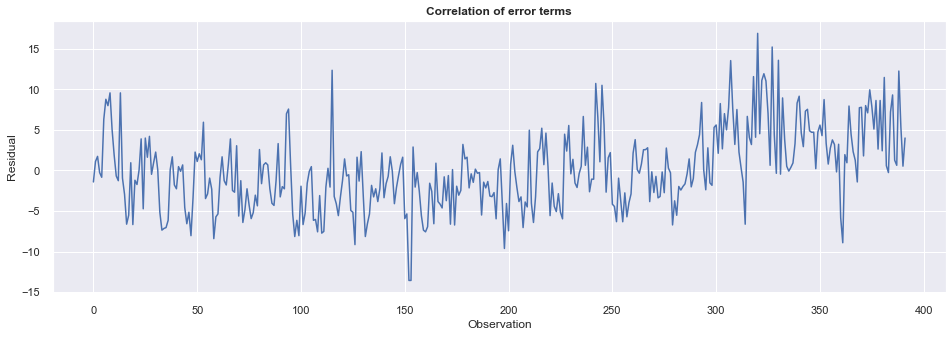

In [18]:
def lm_residual_corr_plot(lm_stats_df):
    r = lm_stats_df['residual']
    #building out plot
    plt.figure(1, figsize = (16,5))
    ax = sns.lineplot(x =list(range(r.shape[0])), y = r)
    plt.xlabel('Observation')
    plt.ylabel('Residual')
    plt.title('Correlation of error terms', fontweight='bold');  

lm_residual_corr_plot(lm_stats(X, y, y_pred))


# 9. This question involves the use of multiple linear regression on the Auto data set.

(a) Produce a scatterplot matrix which includes all of the variables in the data set.

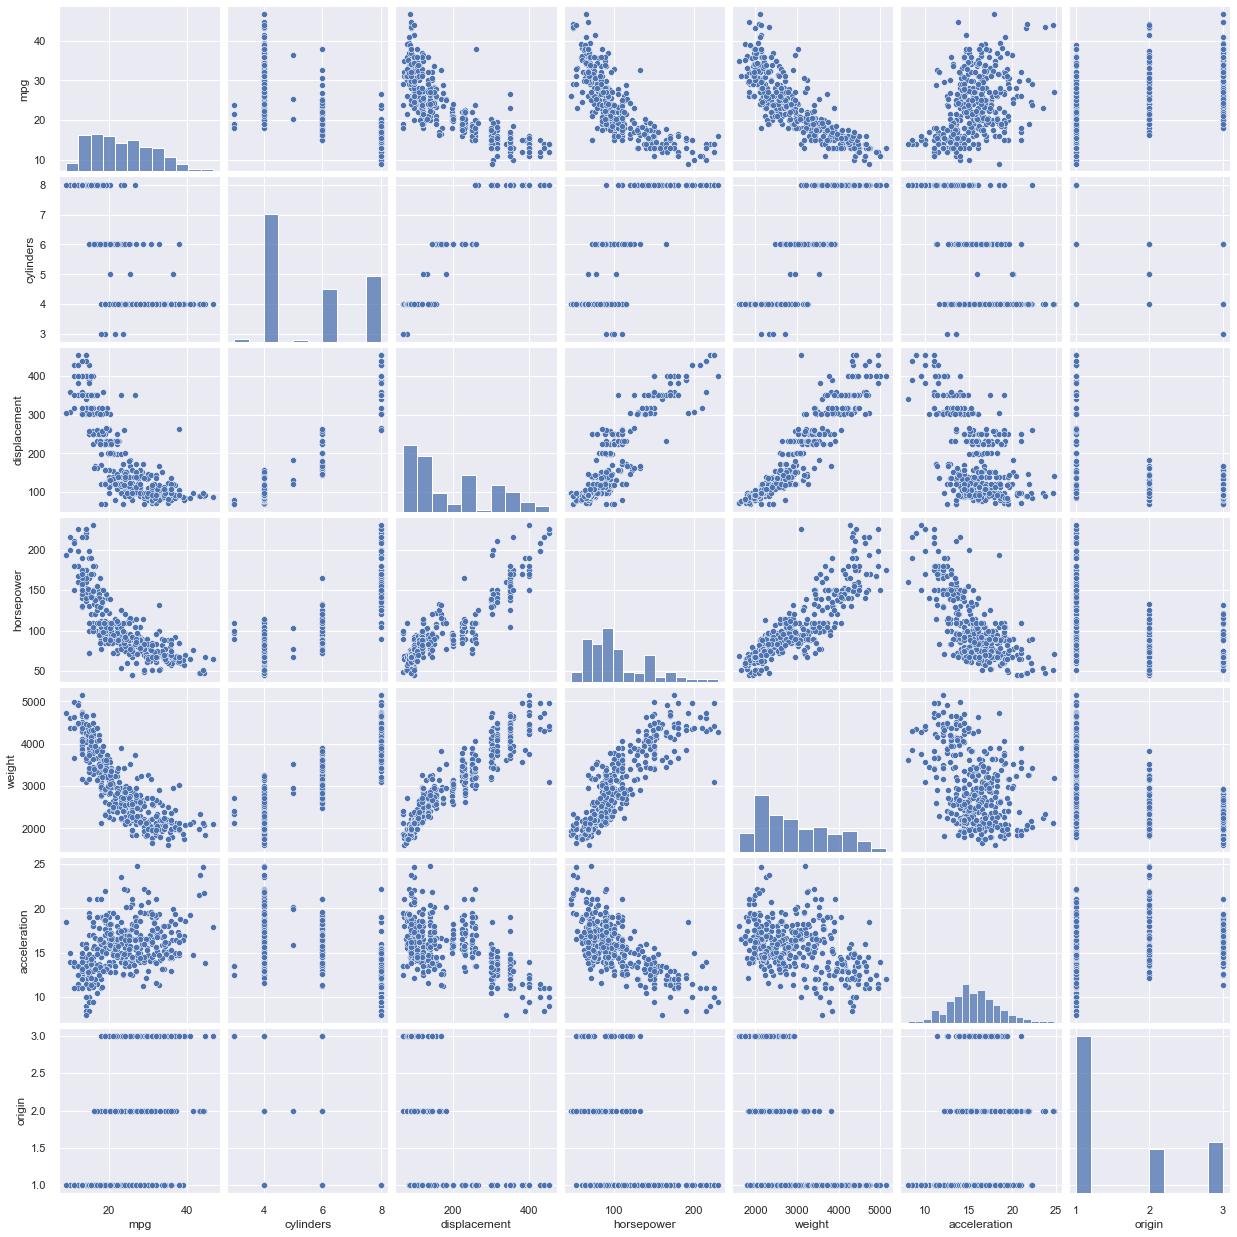

In [19]:
sns.pairplot(auto) ;

(b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.

In [20]:
# we can't pass strings into sns.heat so we  will need to drop "names"
auto.drop(columns =['name'], inplace = True)

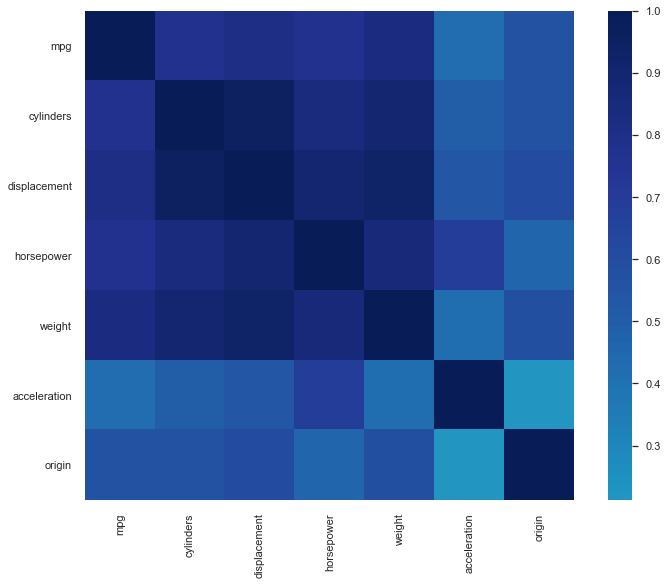

In [21]:
# .abs() = getting the absolute value of each observation 
# .corr() = finds the pair wise correlation of each column in [auto]
corr_matrix = auto.corr().abs()
# settting our figuare size
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corr_matrix, vmax = 1, square = True, cmap = 'YlGnBu', center = 0)
#rotating our axis
plt. xticks(rotation = 90)
plt. yticks(rotation = 0);

(c) Perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:¶


In [2]:
# mpg = predictor and every other i is our respondent
f = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + acceleration + C(origin)'
y,x  = patsy.dmatrices(f, auto, return_type = 'dataframe')

model = sm.OLS(y,x).fit()
print(model.summary())

NameError: name 'patsy' is not defined

In [ ]:
# p-values greater then .05
# we can accept the null- there is no relationship between mpg and these respondence
model.pvalues[model.pvalues < 0.05].sort_values()

Intercept         1.506997e-48
weight            6.096701e-09
C(origin)[T.3]    3.103528e-05
horsepower        3.144978e-04
dtype: float64

ERROR! Session/line number was not unique in database. History logging moved to new session 135


In [ ]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'origin'],
      dtype='object')

In [ ]:
TEST